# Kaggle Competition - House Prices: Advanced Regression Techniques

Author: Hamza Bendemra <br>
Python version: 3.6.8 <br>

**Contents:**
* [1. Framing the Problem](#first-bullet)
* [2. Get the Data](#second-bullet)
* [3. Exploratory Data Analysis](#third-bullet)
* [4. Data Preparation](#fourth-bullet)
* [5. Maching Learning Models](#fifth-bullet)
* [6 . Fine-Tuning ML Hyper-Parameters](#sixth-bullet)
* [7 . Blending ML Algorithms](#seventh-bullet)
* [8 . Submission](#eigth-bullet)

First of all, I would like to acknowledge some great kernels out there that have influenced my approach in this kernel. I highly recommend checking them out also:
- [Stacked Regressions : Top 4% on LeaderBoard](https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard) by Serigne 
- [Comprehensive data exploration with Python](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python) by Pedro Marcelino
- [Blend&Stack LR&GB = 0.10649 {House Prices} v57](https://www.kaggle.com/itslek/blend-stack-lr-gb-0-10649-house-prices-v57) by Nanashi

----
<a class="anchor" id="first-bullet"></a>
## 1. Framing the Problem

With **79 explanatory variables** describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home. Great for **practicing skills** such as: <br>
- Creative feature engineering
- Advanced regression techniques like random forest and gradient boosting

Submitted datasets include: <br>
- train.csv - the training set
- test.csv - the test set
- data_description.txt - full description of each column

In this ML project, we will train an ML model to predict a home's value based on supplied feature vectors. <br>
We will also look at what are the **leading predictors to determine home's value**. <br>

ML category: **Supervised Learning (offline)** <br>
Problem Type: **Regression** <br>
Target outcome type: **Numerical** <br>
Data Type: **Tabular** (CSV files) <br>
Performance Measure: **Root-Mean-Squared-Error (RMSE)** between the logarithm of the predicted value and the logarithm of the observed sales price. <br>
Performance Requirement: **minimize RMSE** <br>

----
<a class="anchor" id="second-bullet"></a>
## 2. Get the Data

### 2.1 Import Python libraries

In [1]:
# importing Python modules
import os
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))
print("Python environment: {}".format(sys.executable))

import pandas as pd 
from pandas import ExcelWriter
from pandas import ExcelFile
#from openpyxl import load_workbook
print("pandas version: {}". format(pd.__version__))

import plotly_express as px
import matplotlib #collection of functions for scientific and publication-ready visualization
import matplotlib.pyplot as plt # for plotting
%matplotlib inline
print("matplotlib version: {}". format(matplotlib.__version__))
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
print("seaborn version: {}". format(sns.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))
import scipy as sp #collection of functions for scientific computing and advance mathematics
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
from IPython.display import display
pd.options.display.max_columns = None
print("IPython version: {}". format(IPython.__version__)) 

import datetime
from datetime import datetime
from dateutil.parser import parse
from time import time

# to make this notebook's output identical at every run
np.random.seed(42)

print("Imported required Python packages")

Python version: 3.6.6 |Anaconda, Inc.| (default, Oct  9 2018, 12:34:16) 
[GCC 7.3.0]
Python environment: /opt/conda/bin/python
pandas version: 0.23.4
matplotlib version: 3.0.0
seaborn version: 0.9.0
NumPy version: 1.16.4
SciPy version: 1.3.0
IPython version: 7.5.0
Imported required Python packages


In [2]:
# scikit-learn modules
import sklearn
print("scikit-learn version: {}". format(sklearn.__version__))
# sklearn modules for preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# from imblearn.over_sampling import SMOTE  # SMOTE
# sklearn modules for ML model selection
from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Libraries for data modelling
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor # import RandomForestRegressor
from sklearn.ensemble  import AdaBoostClassifier
from sklearn.ensemble  import GradientBoostingRegressor
from sklearn.linear_model import Lasso

# Common sklearn Model Helpers
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, RobustScaler
# from sklearn.datasets import make_classification

# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score
from sklearn.metrics import r2_score, make_scorer, mean_squared_error
print("scikit-learn libraries imported successfully")

# Other ML algorithms
from lightgbm import LGBMRegressor
print("lightgbm imported")
import xgboost as xgb
print("xgboost imported")
from mlxtend.regressor import StackingCVRegressor, StackingRegressor
print("StackingRegressor imported")

scikit-learn version: 0.21.2
scikit-learn libraries imported successfully
lightgbm imported
xgboost imported
StackingRegressor imported


In [3]:
import warnings
warnings.simplefilter('ignore')
#warnings.simplefilter(action='ignore', category=FutureWarning)

### 2.2 Import data

The data is provided by the Kaggle competition in the form or of two CSV files. <br>
A **training** and **testing** dataset are provided.

In [4]:
# Input data files are available in the "../input/" directory.
print(os.listdir("../input"))
# Any results written to the current directory are saved as output.

['sample_submission.csv', 'train.csv', 'test.csv', 'data_description.txt']


In [5]:
# importing the supplied dataset and storing it in a dataframe
training = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
# making copies of original datasets for rest of this kernel
df_train = training.copy()
df_test = test.copy()
print(df_train.shape, df_test.shape)

(1460, 81) (1459, 80)


In [6]:
#drop target variable from training dataset
target = df_train['SalePrice']  #target variable
df_train = df_train.drop('SalePrice', axis=1) 

print("Training: {}, Target: {}, Test: {}".format(df_train.shape, target.shape, df_test.shape))

Training: (1460, 80), Target: (1460,), Test: (1459, 80)


----
<a class="anchor" id="third-bullet"></a>
## 3. Exploratory Data Analysis

> It is important to deploy **descriptive and graphical statistics** to look for potential **problems**, **patterns**, **classifications**, **correlations** and **comparisons** in the dataset. In addition, **data categorization** (i.e. qualitative vs quantitative) is also important to understand and select the correct hypothesis test or data model.

### 3.1 Quick EDA

In [7]:
df_train_exp = df_train.copy() #make a copy of the training dataset for EDA purposes
print(df_train_exp.shape) 

(1460, 80)


**We have 1460 observations of 80 variables in the training dataframe**. The variables are described below: <br>

> **SalePrice** - the property's sale price in dollars. This is the target variable that you're trying to predict. <br><br>
MSSubClass: The building class <br>
MSZoning: The general zoning classification <br>
LotFrontage: Linear feet of street connected to property <br>
LotArea: Lot size in square feet <br>
Street: Type of road access <br>
Alley: Type of alley access <br>
LotShape: General shape of property <br>
LandContour: Flatness of the property <br>
Utilities: Type of utilities available <br>
LotConfig: Lot configuration <br>
LandSlope: Slope of property <br>
Neighborhood: Physical locations within Ames city limits <br>
Condition1: Proximity to main road or railroad <br>
Condition2: Proximity to main road or railroad (if a second is present) <br>
BldgType: Type of dwelling <br>
HouseStyle: Style of dwelling <br>
OverallQual: Overall material and finish quality <br>
OverallCond: Overall condition rating <br>
YearBuilt: Original construction date <br>
YearRemodAdd: Remodel date <br>
RoofStyle: Type of roof <br>
RoofMatl: Roof material <br>
Exterior1st: Exterior covering on house <br>
Exterior2nd: Exterior covering on house (if more than one material) <br>
MasVnrType: Masonry veneer type <br>
MasVnrArea: Masonry veneer area in square feet <br>
ExterQual: Exterior material quality <br>
ExterCond: Present condition of the material on the exterior <br>
Foundation: Type of foundation <br>
BsmtQual: Height of the basement <br>
BsmtCond: General condition of the basement <br>
BsmtExposure: Walkout or garden level basement walls <br>
BsmtFinType1: Quality of basement finished area <br>
BsmtFinSF1: Type 1 finished square feet <br>
BsmtFinType2: Quality of second finished area (if present) <br>
BsmtFinSF2: Type 2 finished square feet <br>
BsmtUnfSF: Unfinished square feet of basement area <br>
TotalBsmtSF: Total square feet of basement area <br>
Heating: Type of heating <br>
HeatingQC: Heating quality and condition <br>
CentralAir: Central air conditioning <br>
Electrical: Electrical system <br>
1stFlrSF: First Floor square feet <br>
2ndFlrSF: Second floor square feet <br>
LowQualFinSF: Low quality finished square feet (all floors) <br>
GrLivArea: Above grade (ground) living area square feet <br>
BsmtFullBath: Basement full bathrooms <br>
BsmtHalfBath: Basement half bathrooms <br>
FullBath: Full bathrooms above grade <br>
HalfBath: Half baths above grade <br> 
Bedroom: Number of bedrooms above basement level <br> 
Kitchen: Number of kitchens <br> 
KitchenQual: Kitchen quality <br> 
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms) <br> 
Functional: Home functionality rating
Fireplaces: Number of fireplaces <br>
FireplaceQu: Fireplace quality <br>
GarageType: Garage location <br>
GarageYrBlt: Year garage was built <br>
GarageFinish: Interior finish of the garage <br>
GarageCars: Size of garage in car capacity <br>
GarageArea: Size of garage in square feet <br>
GarageQual: Garage quality <br>
GarageCond: Garage condition <br>
PavedDrive: Paved driveway <br>
WoodDeckSF: Wood deck area in square feet <br>
OpenPorchSF: Open porch area in square feet <br>
EnclosedPorch: Enclosed porch area in square feet <br>
3SsnPorch: Three season porch area in square feet <br>
ScreenPorch: Screen porch area in square feet <br>
PoolArea: Pool area in square feet <br>
PoolQC: Pool quality <br>
Fence: Fence quality <br>
MiscFeature: Miscellaneous feature not covered in other categories <br>
MiscVal: $Value of miscellaneous feature <br>
MoSold: Month Sold <br>
YrSold: Year Sold <br>
SaleType: Type of sale <br>
SaleCondition: Condition of sale <br>

In [8]:
df_train_exp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [9]:
print("{} Numerical columns, {} Categorial columns".format(
    list(df_train_exp.select_dtypes(include=[np.number]).shape)[1],
    list(df_train_exp.select_dtypes(include = ['object']).shape)[1]))

37 Numerical columns, 43 Categorial columns


> We note that their are quite a few non-numerical variables, which would result in a large number of columns in our training dataframe once we implement one-hot encoding prior to fitting our model.

In [10]:
# let's break down the columns by their type (i.e. int64, float64, object)
df_train_exp.columns.to_series().groupby(df_train_exp.dtypes).groups

{dtype('int64'): Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
        'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
        'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
        'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
        'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
        'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
        'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
       dtype='object'),
 dtype('float64'): Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object'),
 dtype('O'): Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
        'BsmtQual', 'BsmtCond', '

In [11]:
#list of columns with missing values
print("{} columns have missing values:".format(
    len(df_train_exp.columns[df_train_exp.isna().any()].tolist())))
df_train_exp.columns[df_train_exp.isna().any()].tolist()

19 columns have missing values:


['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [12]:
df_train_exp.describe() # let's have a look at variable types in our dataframe

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


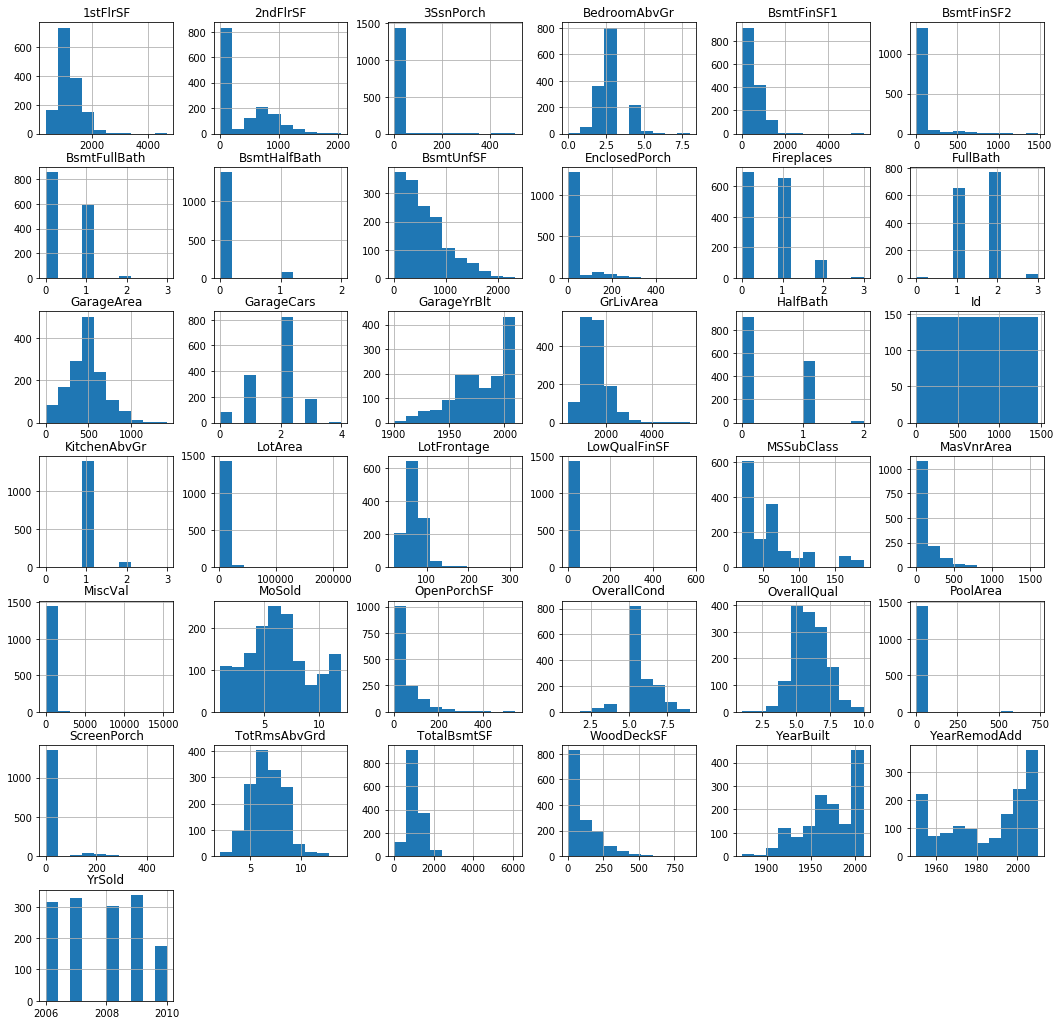

In [13]:
df_train_exp.hist(figsize=(18,18))
plt.show()

In [14]:
# Testing for normal distribution hypothesis in numerical features
test_normality = lambda x: stats.shapiro(x.fillna(0))[1] < 0.01
numerical_features = [f for f in df_train_exp.columns if df_train_exp.dtypes[f] != 'object']
normal = pd.DataFrame(df_train_exp[numerical_features])
normal = normal.apply(test_normality)
print(not normal.any())

False


**A few observations can be made based on the EDA so far**:
- The trainig dataset has 19 features (out 80) with missing values
- Numerical features histograms' clearly show that some features are tail-heavy; indeed several distributions are right- or left-skewed (e.g. OpenPorchSF, 2ndFlrSF). Data transformation methods may be required to approach a normal distribution prior to fitting a model to the data.
- Feature "Id" is likely to be a unique identifier for the homes recorded given the feature's quasi-uniform distribution, and should be removed in pre-processing.

### 3.2 Correlation Map

> Let's take a look at a correltion map. I'll then focus on the top most strongly correlated features with the target feature. Note: when the variables are not normally distributed or the relationship between the variables is not linear (as is the case here), it is more appropriate to use the **Spearman rank correlation method** rather than the default Pearson's method.

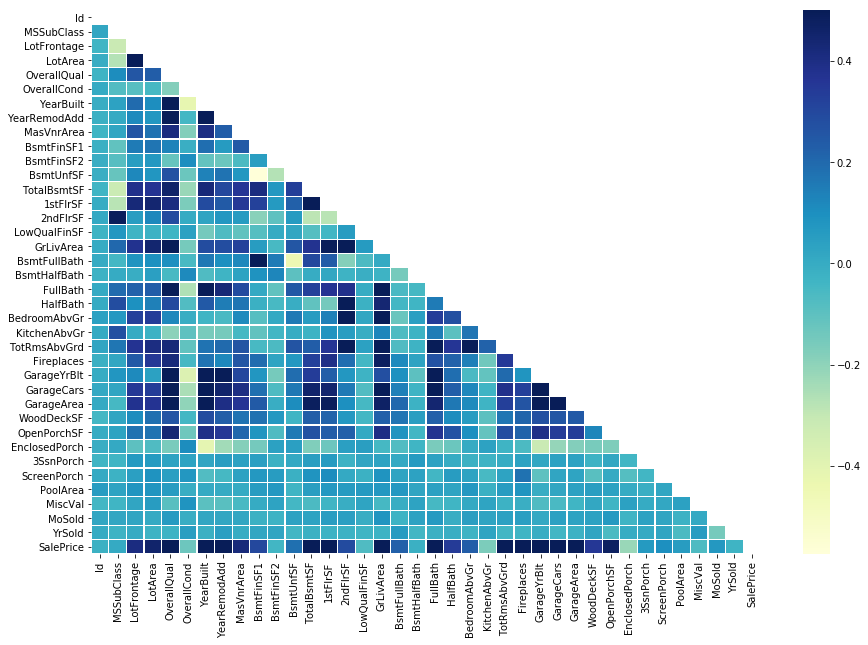

In [15]:
# Calculate correlations
corr = training.corr(method='spearman')
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
            #annot=True, 
            fmt='.2f',
            linewidths=.2, cmap="YlGnBu");

> Focusing solely on the **'SalePrice' feature** (bottom row), we can see **strong correlations with various variables** including OverallQual, GrLivArea, and GarageCars - all three of these intuitively make sense that they would strongly affect a home's price. However, let's not forget that Pearson's **correlation factor only picks up linear relationships**, more complex relationships surely exist between other features and the target feature.

In [16]:
# Find correlations with the target and sort
correlations = training.corr(method='spearman')['SalePrice'].sort_values(ascending=False)
correlations_abs = correlations.abs()
print('\nTop 10 correlations (absolute):\n', correlations_abs.head(11))


Top 10 correlations (absolute):
 SalePrice       1.000000
OverallQual     0.809829
GrLivArea       0.731310
GarageCars      0.690711
YearBuilt       0.652682
GarageArea      0.649379
FullBath        0.635957
TotalBsmtSF     0.602725
GarageYrBlt     0.593788
1stFlrSF        0.575408
YearRemodAdd    0.571159
Name: SalePrice, dtype: float64


---
<a class="anchor" id="third-bullet"></a>
### 3.3 Target Feature: SalePrice

> Let's spent some time getting to know our target variable 'SalePrice'.

In [17]:
target_exp = target.copy() #make copy for exploratory purposes

In [18]:
# let's see if there are any missing values (i.e. NA)
print("There are {} NA values in 'SalePrice'".format(target_exp.isnull().values.sum()))

There are 0 NA values in 'SalePrice'


Skewness: 1.882876
Normal dist. ($\mu=$ 180921.20 and $\sigma=$ 79415.29 )


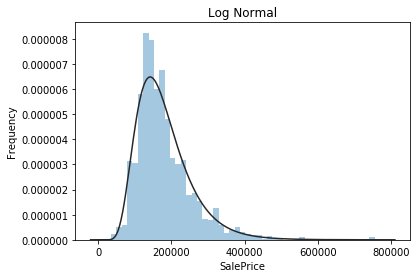

In [19]:
y = target_exp
plt.figure(1); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=stats.lognorm)
plt.ylabel('Frequency')
print("Skewness: %f" % target_exp.skew())
# get mean and standard deviation
(mu, sigma) = norm.fit(target_exp)
print('Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma))

In [20]:
# let's get some stats on the 'SalePrice' variable
print("Statistics for the supplied house prices training dataset:\n")
print("Minimum price: ${:,.2f}".format(np.min(target_exp)))
print("Maximum price: ${:,.2f}".format(np.max(target_exp)))
print("Mean price: ${:,.2f}".format(np.mean(target_exp)))
print("Median price ${:,.2f}".format(np.median(target_exp)))
print("Standard deviation of prices: ${:,.2f}".format(np.std(target_exp)))

Statistics for the supplied house prices training dataset:

Minimum price: $34,900.00
Maximum price: $755,000.00
Mean price: $180,921.20
Median price $163,000.00
Standard deviation of prices: $79,415.29


IQR value: 84025.0
# of outliers: 61


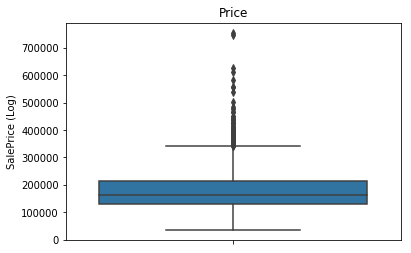

In [21]:
#  To get a visual of the outliers, let's plot a box plot.
sns.boxplot(y = target)
plt.ylabel('SalePrice (Log)')
plt.title('Price');

# count number of outliers after transformation is applied
Q1 = target.quantile(0.25)
Q3 = target.quantile(0.75)
IQR = Q3 - Q1
print("IQR value: {}\n# of outliers: {}".format(
    IQR,
    ((target < (Q1 - 1.5 * IQR)) | (target > (Q3 + 1.5 * IQR))).sum()))

**Remarks:**
> As we can see on the plot, the distribution of 'SalePrice' is right-skewed which is reflected in the skewness factor which is positive. We would like to get the **skewness factor as close to zero as possible** (i.e. a normal or Gaussian distribution).

> This can accomplished by either removing outliers or **transforming the variable**. Removing outliers may be tricky as expertise in real estate is needed to assess whether whether outliers should be removed or not. Applying transformations is typically a safer option if it can deliver the desired outcome. In the case of positive skewness, **log transformation** does the trick.

---
<a class="anchor" id="fourth-bullet"></a>
## 4. Data Preparation

This step is often referred to as **data wrangling** which includes implementing **data architectures for storage and processing**, developing data **governance standards** for quality and control, **data extraction** (i.e. ETL and web scraping), and **data cleaning** to identify aberrant, missing, or outlier data points.

In this stage, we will clean our data by:<br> 
1. Data Cleaning: Outliers and Missing Values, <br>
2. Feature Selection, <br>
3. Feature Engineering, <br>
4. Label Encoding and Feature Scaling

### 4.1 Log Transformation: Target Feature

Skewness: 0.121347


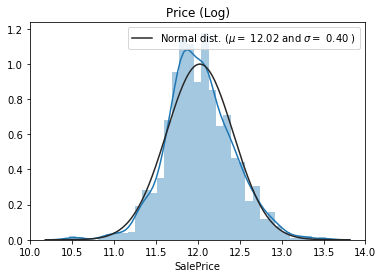

In [22]:
#applying log transformation to the Target Variable
target_tr = np.log1p(target)

# let's plot a histogram with the fitted parameters used by the function
sns.distplot(target_tr , fit=norm);
(mu, sigma) = norm.fit(target_tr)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.title('Price (Log)');
print("Skewness: %f" % target_tr.skew())

IQR value: 0.49863092538878107
# of outliers: 28


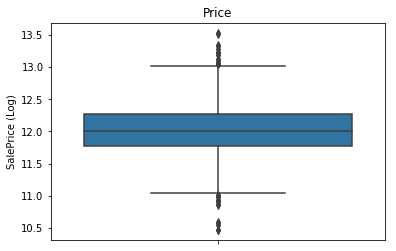

In [23]:
#  To get a visual of the outliers, let's plot a box plot.
sns.boxplot(y = target_tr)
plt.ylabel('SalePrice (Log)')
plt.title('Price');

# count number of outliers after transformation is applied
Q1 = target_tr.quantile(0.25)
Q3 = target_tr.quantile(0.75)
IQR = Q3 - Q1
print("IQR value: {}\n# of outliers: {}".format(
    IQR,
    ((target_tr < (Q1 - 1.5 * IQR)) | (target_tr > (Q3 + 1.5 * IQR))).sum()))

> As we can see above, applying a log-transformation has significantly taken our distribution closer to a normal distribution. The skewness measure is also much closer to zero, with a valuoe of 0.121335.

### 4.2 Missing Values

Let's focus on our training dataset and see which variables have missing values.

In [24]:
perc_na = (df_train.isnull().sum()/len(df_train))*100
ratio_na = perc_na.sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Values Ratio' :ratio_na})
print(missing_data.shape)
missing_data.head(20)

(80, 1)


,Missing Values Ratio
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageCond,5.547945
GarageType,5.547945
GarageYrBlt,5.547945
GarageFinish,5.547945


> According to the our analysis, the top variables with the most percentage of missing values (>15%) are:
- PoolQC with 99.5%
- MiscFeature with 96.30%
- Alley	with 93.77%
- Fence	with 80.75%
- FireplaceQu with 47.26%
- LotFrontage with 17.740%

### 4.3 Pre-processing Pipeline

In [25]:
def house_pipeline_v1(dataframe,
                      impute_method = "median",
                      feature_transform = "yes",
                      feature_scaling = "RobustScaler", 
                      feature_selection = "yes"):
    # 0. initialising dataframe
    df_pipe = dataframe.copy()
    print("Dataframe loaded.")
    
    # Drop redundant columns
    df_pipe.drop(['Id'], axis=1, inplace=True) # drop Id column
    print("Dropped redundant column 'Id'.")

    # column types variables
    numeric_features = list(df_pipe.select_dtypes(
        include=[np.number]).columns.values)
    categ_features = list(df_pipe.select_dtypes(
        include=['object']).columns.values)
    for col in numeric_features:
        df_pipe[col] = df_pipe[col].astype(float)

    # 1. Handling missing values
    # replacing NaNs in categorical features with "None"
    df_pipe[categ_features] = df_pipe[categ_features].apply(
        lambda x: x.fillna("None"), axis=0)

    # imputing numerical features
    for col in ("LotFrontage", 'GarageYrBlt', 'GarageArea', 'GarageCars'):
        df_pipe[col].fillna(0.0, inplace=True)
        
    if impute_method == "median": # replacing NaNs in numerical features with the median
        df_pipe[numeric_features] = df_pipe[numeric_features].apply(
            lambda x: x.fillna(x.median()), axis=0)
        print("Missing values imputed with median.")
    
    elif impute_method == "mean": # replacing NaNs in numerical features with the mean
        df_pipe[numeric_features] = df_pipe[numeric_features].apply(
            lambda x: x.fillna(x.mean()), axis=0)
        print("Missing values imputed with mean.")

    # 2. Feature Engineering
    # Examples: Discretize Continous Feature;
    #           Decompose Features;
    #           Add Combination of Feature
    df_pipe['YrBltAndRemod']=df_pipe['YearBuilt']+df_pipe['YearRemodAdd']
    df_pipe['TotalSF']=df_pipe['TotalBsmtSF'] + df_pipe['1stFlrSF'] + df_pipe['2ndFlrSF']

    df_pipe['Total_sqr_footage'] = (df_pipe['BsmtFinSF1'] + df_pipe['BsmtFinSF2'] +
                                     df_pipe['1stFlrSF'] + df_pipe['2ndFlrSF'])

    df_pipe['Total_Bathrooms'] = (df_pipe['FullBath'] + (0.5 * df_pipe['HalfBath']) +
                                   df_pipe['BsmtFullBath'] + (0.5 * df_pipe['BsmtHalfBath']))

    df_pipe['Total_porch_sf'] = (df_pipe['OpenPorchSF'] + df_pipe['3SsnPorch'] +
                                  df_pipe['EnclosedPorch'] + df_pipe['ScreenPorch'] + 
                                 df_pipe['WoodDeckSF'])
    print("Feature enginering: added combination of features.")
    
    df_pipe['haspool'] = df_pipe['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
    df_pipe['has2ndfloor'] = df_pipe['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
    df_pipe['hasgarage'] = df_pipe['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
    df_pipe['hasbsmt'] = df_pipe['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
    df_pipe['hasfireplace'] = df_pipe['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
    print("Feature enginering: added boolean features.")
    
    # 3. Feature Transformations (log(x), sqrt(x), x^2, etc.)
    # Transform numerical features that should be considered as strings 
    df_pipe['MSSubClass'] = df_pipe['MSSubClass'].apply(str)
    df_pipe['YrSold'] = df_pipe['YrSold'].astype(str)
    df_pipe['MoSold'] = df_pipe['MoSold'].astype(str)
    df_pipe['YrBltAndRemod'] = df_pipe['YrBltAndRemod'].astype(str)
    print("Transformed numerical features that should be considered as strings.")
    
    numeric_features = list(df_pipe.select_dtypes(
        include=[np.number]).columns.values)
    categ_features = list(df_pipe.select_dtypes(
        include=['object']).columns.values)
    
    if feature_transform == "yes":
        # Transform all numerical columns with skewness factor > 0.5
        skew_features = df_pipe[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)
        high_skew = skew_features[skew_features > 0.5]
        skew_index = high_skew.index
        for i in skew_index:
            df_pipe[i] = boxcox1p(df_pipe[i], boxcox_normmax(df_pipe[i]+1))
        print("Transformed numerical columns with high skewness factor.")
    elif feature_transform == "no":
        pass

    # 4. Label Encoding
    df_pipe = pd.get_dummies(df_pipe)
    print("Label Encoding: from {} cols to {} cols.".format(
        dataframe.shape[1], df_pipe.shape[1]))

    # 5. Feature Scaling
    #cols = df_pipe.select_dtypes([np.number]).columns
    if feature_scaling == 'MinMaxScaler':
        scaler = MinMaxScaler(feature_range=(0, 1))
        for col in numeric_features:
            df_pipe[[col]] = scaler.fit_transform(df_pipe[[col]])
        print("Performed feature Scaling with MinMaxScaler.")

    elif feature_scaling == 'StandardScaler':
        scaler = StandardScaler()
        for col in numeric_features:
            df_pipe[[col]] = scaler.fit_transform(df_pipe[[col]])
        print("Performed feature Scaling with StandardScaler.")

    elif feature_scaling == "RobustScaler":
        scaler = RobustScaler()
        for col in numeric_features:
            df_pipe[[col]] = scaler.fit_transform(df_pipe[[col]])
        print("Performed feature Scaling with RobustScaler.")
    
    # 6. Feature Selection
    ## let's remove columns with little variance (to reduce overfitting)
    overfit = []
    for i in df_pipe.columns:
        counts = df_pipe[i].value_counts()
        zeros = counts.iloc[0]
        if zeros / len(df_pipe) * 100 > 99.9: # the threshold is set at 99.9%
            overfit.append(i)
    overfit = list(overfit)
    # let's make sure to keep data processing columns needed later on
    try:
        overfit.remove('Dataset_Train')
        overfit.remove('Dataset_Test')
    except:
        pass
    df_pipe.drop(overfit, axis=1, inplace=True)
    print("To prevent overfitting, {} columns were removed.".format(len(overfit)))
    
    ## Summary
    print("Shape of transformed dataset: {} (original: {})".format(df_pipe.shape, dataframe.shape))
    return df_pipe

In [26]:
def target_transf(target, 
                  transform="log"):
    
    if transform == "log":
        target_tranf = np.log1p(target)
        print("Target feature transformed with natural logarithm.")
    
    elif transform == "sqrt":
        target_tranf = np.sqrt(target)
        print("Target feature transformed with sqrt.")
    
    elif transform == "square":
        target_tranf = np.square(target)
        print("Target feature transformed with square.")
    
    print("Shape of transformed target: {}".format(target_tr.shape))
    return target_tranf

In [27]:
# Test pipeline
df_train_test = house_pipeline_v1(df_train)
print("\n")
target_tr = target_transf(target)

Dataframe loaded.
Dropped redundant column 'Id'.
Missing values imputed with median.
Feature enginering: added combination of features.
Feature enginering: added boolean features.
Transformed numerical features that should be considered as strings.
Transformed numerical columns with high skewness factor.
Label Encoding: from 80 cols to 505 cols.
Performed feature Scaling with RobustScaler.
To prevent overfitting, 35 columns were removed.
Shape of transformed dataset: (1460, 470) (original: (1460, 80))


Target feature transformed with natural logarithm.
Shape of transformed target: (1460,)


### 4.4 Pipeline Validation

In [28]:
# let's check that we no longer have any missing values
perc_na = (df_train_test.isnull().sum()/len(df_train_test))*100
ratio_na = perc_na.sort_values(ascending=False)
missing_data = pd.DataFrame({'missing_ratio' :ratio_na})
missing_data = missing_data.drop(missing_data[missing_data.missing_ratio == 0].index)
missing_data.head(5)

,missing_ratio


Skewness: 0.121347


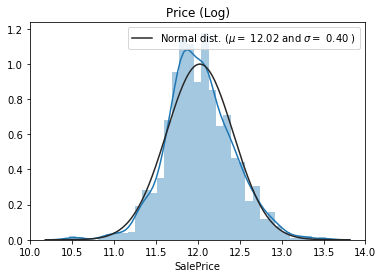

In [29]:
# target feature transformed
sns.distplot(target_tr , fit=norm);
(mu, sigma) = norm.fit(target_tr)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.title('Price (Log)');
print("Skewness: %f" % target_tr.skew())

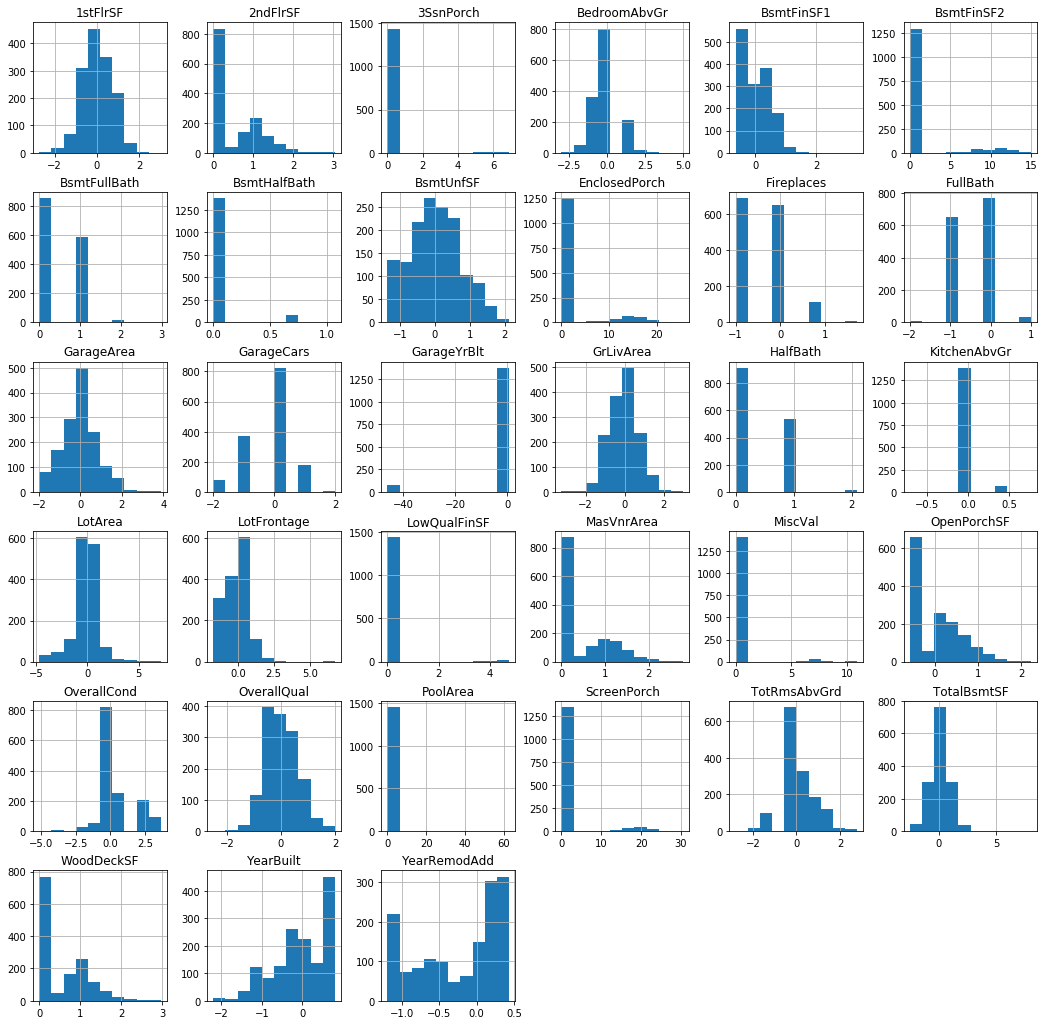

In [30]:
## Feature Scaling
col_eda = list(correlations_abs.index)
df_train_scal = df_train_test.filter(col_eda, axis=1).copy()
df_train_scal.hist(figsize=(18,18))
plt.show()

----
<a class="anchor" id="fifth-bullet"></a>
## 5. Machine Learning Models

### 5.1 Data Prep for ML

In [31]:
# Copy dataframes prior to data processing
df_train_pipeline = df_train.copy()
df_test_pipeline = df_test.copy()
# Concat dataframes
df_train_pipeline["Dataset"] = "Train"
df_test_pipeline["Dataset"] = "Test"
# Concat dataframes
df_joined = pd.concat([df_train_pipeline, df_test_pipeline], 
                      sort=False)
df_joined = df_joined.reset_index(drop=True) # reset index
print("Joined Dataframe shape: {}".format(df_joined.shape))

Joined Dataframe shape: (2919, 81)


In [32]:
df_joined_ml = house_pipeline_v1(df_joined,
                                 impute_method = "median",
                                 feature_transform = "yes",
                                 feature_scaling = "RobustScaler", 
                                 feature_selection = "yes")
print("----\n")
target_ml = target_transf(target)
print("----\n")
print("Transformed Joined Dataframe shape: {}, and target shape: {}".format(
    df_joined_ml.shape, target_ml.shape))

Dataframe loaded.
Dropped redundant column 'Id'.
Missing values imputed with median.
Feature enginering: added combination of features.
Feature enginering: added boolean features.
Transformed numerical features that should be considered as strings.
Transformed numerical columns with high skewness factor.
Label Encoding: from 81 cols to 521 cols.
Performed feature Scaling with RobustScaler.
To prevent overfitting, 44 columns were removed.
Shape of transformed dataset: (2919, 477) (original: (2919, 81))
----

Target feature transformed with natural logarithm.
Shape of transformed target: (1460,)
----

Transformed Joined Dataframe shape: (2919, 477), and target shape: (1460,)


In [33]:
# Extract Training data from joined transformed dataset
df_train_ml = df_joined_ml[df_joined_ml['Dataset_Train']==1].copy()
# Remove redundant features
df_train_ml.drop(['Dataset_Train'], axis=1, inplace=True)
df_train_ml.drop(['Dataset_Test'], axis=1, inplace=True)
# Reset index
df_train_ml = df_train_ml.reset_index(drop=True) 
print(df_train_ml.shape)

(1460, 475)


In [34]:
# Extract Testing data from joined transformed dataset
df_test_ml = df_joined_ml[df_joined_ml['Dataset_Test']==1].copy()
# Remove redundant features
df_test_ml.drop(['Dataset_Train'], axis=1, inplace=True)
df_test_ml.drop(['Dataset_Test'], axis=1, inplace=True)
# Reset index
df_test_ml = df_test_ml.reset_index(drop=True)
print(df_test_ml.shape)

(1459, 475)


>  Splitting Training Dataframe prior to training ML algorithms using cross-validation. I've chosen to "stratify" my training sets as per the feature with the stronges correlation with the target label.

In [35]:
X_train, X_test, y_train, y_test = train_test_split(df_train_ml,
                                                    target_ml,
                                                    test_size=0.2,
                                                    stratify=df_train_ml['OverallQual'],
                                                    random_state=42)

In [36]:
print("Training Data Shape: {}".format(df_train_ml.shape))
print("X_train Shape: {}".format(X_train.shape))
print("X_test Shape: {}".format(X_test.shape))

Training Data Shape: (1460, 475)
X_train Shape: (1168, 475)
X_test Shape: (292, 475)


### 5.2 Baseline Results

In [37]:
# selection of algorithms to consider
models = []
models.append(('Ridge Regression', Ridge(alpha=1.0)))
models.append(('ElasticNet', ElasticNet()))
models.append(('Random Forest', RandomForestRegressor(
    n_estimators=100, random_state=7)))
models.append(('Lasso', Lasso(random_state=42)))
models.append(('XGBoost Regressor', xgb.XGBRegressor(objective='reg:squarederror', 
                                                     random_state=42)))
models.append(('Gradient Boosting Regressor', GradientBoostingRegressor()))
models.append(('LGBM Regressor',LGBMRegressor(objective='regression')))
models.append(('SVR',SVR()))

# set table to table to populate with performance results
rmse_results = []
names = []
col = ['Algorithm', 'RMSE Mean', 'RMSE SD']
df_results = pd.DataFrame(columns=col)

# evaluate each model using cross-validation
kfold = model_selection.KFold(n_splits=5, shuffle = True, random_state=7)
i = 0
for name, model in models:
    # -mse scoring
    cv_mse_results = model_selection.cross_val_score(
        model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    # calculate and append rmse results
    cv_rmse_results = np.sqrt(-cv_mse_results)
    rmse_results.append(cv_rmse_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_rmse_results.mean(), 4),
                         round(cv_rmse_results.std(), 4)]
    i += 1
df_results.sort_values(by=['RMSE Mean'], ascending=True).reset_index(drop=True)

,Algorithm,RMSE Mean,RMSE SD
0,XGBoost Regressor,0.1214,0.0107
1,Gradient Boosting Regressor,0.1247,0.0122
2,SVR,0.1253,0.0064
3,LGBM Regressor,0.1285,0.0120
4,Random Forest,0.1388,0.0138
5,Ridge Regression,0.1392,0.0214
6,ElasticNet,0.3732,0.0115
7,Lasso,0.3831,0.0128


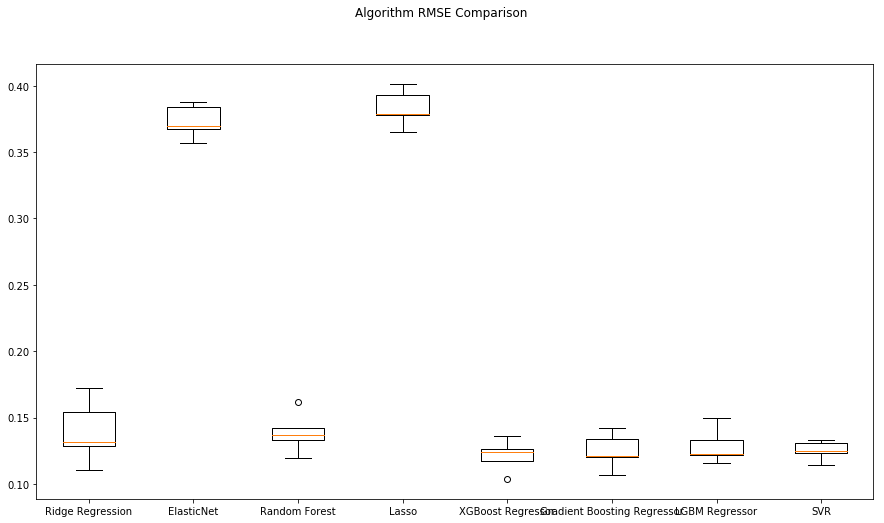

In [38]:
fig = plt.figure(figsize=(15, 8))
fig.suptitle('Algorithm RMSE Comparison')
ax = fig.add_subplot(111)
plt.boxplot(rmse_results)
ax.set_xticklabels(names)
plt.show();

----
<a class="anchor" id="sixth-bullet"></a>
### 6. Fine-Tuning ML Hyper-Parameters

#### 6.1 XGBoost

> XGBoost is short for “Extreme Gradient Boosting” and is popular algorithm on Kaggle. It is fast to implement but time-consuming to tune the hyper-parameters so below, I have included the code for hyperparameter tuning but did not run it on Kaggle.

In [39]:
import xgboost as xgb
xgb_regressor = xgb.XGBRegressor(random_state=42)

> Cross-validation can be used (as shown below) to find optimum hyperparameters. Due to the time needed for RandomizedSearchCV to provide results, I've commended out the next cell but left the code FYI.

In [40]:
# start = time() # Get start time
# cv_sets_xgb = ShuffleSplit(random_state = 10) # shuffling our data for cross-validation
# parameters_xgb = {'n_estimators':range(2000, 8000, 500), 
#              'learning_rate':[0.05,0.060,0.070], 
#              'max_depth':[3,5,7],
#              'min_child_weight':[1,1.5,2]}
# scorer_xgb = make_scorer(mean_squared_error)
# grid_obj_xgb = RandomizedSearchCV(xgb_regressor, 
#                                  parameters_xgb,
#                                  scoring = scorer_xgb, 
#                                  cv = cv_sets_xgb,
#                                  random_state= 99)
# grid_fit_xgb = grid_obj_xgb.fit(X_train, y_train)
# xgb_opt = grid_fit_xgb.best_estimator_

# end = time() # Get end time
# xgb_time = (end-start)/60 # Calculate training time
# print('It took {0:.2f} minutes for RandomizedSearchCV to converge to optimised parameters for the RandomForest model'.format(xgb_time))
# ## Print results
# print('='*20)
# print("best params: " + str(grid_fit_xgb.best_estimator_))
# print("best params: " + str(grid_fit_xgb.best_params_))
# print('best score:', grid_fit_xgb.best_score_)
# print('='*20)

In [41]:
# XGBoost with tuned parameters
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_opt = xgb.XGBRegressor(learning_rate=0.01,
                           n_estimators=6000,
                           max_depth=4,
                           min_child_weight=0,
                           gamma=0.6,
                           subsample=0.7,
                           colsample_bytree=0.7,
                           objective='reg:squarederror',
                           nthread=-1,
                           scale_pos_weight=1,
                           seed=27,
                           reg_alpha=0.00006,
                           random_state=42)

#### 6.2 Gradient Boosting Regressor

In [42]:
gbr = GradientBoostingRegressor(n_estimators=6000,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=42)

#### 6.3 LGBM Regressor

In [43]:
lightgbm = LGBMRegressor(objective='regression', 
                         num_leaves=6,
                         learning_rate=0.01, 
                         n_estimators=7000,
                         max_bin=200, 
                         bagging_fraction=0.8,
                         bagging_freq=4, 
                         bagging_seed=8,
                         feature_fraction=0.2,
                         feature_fraction_seed=8,
                         min_sum_hessian_in_leaf = 11,
                         verbose=-1,
                         random_state=42)

#### 6.4 Random Forest Regressor

In [44]:
# start = time() # Get start time
# rf_regressor = RandomForestRegressor(random_state=42)
# cv_sets = ShuffleSplit(random_state = 4) # shuffling our data for cross-validation
# parameters = {'n_estimators':range(5, 950, 5), 
#               'min_samples_leaf':range(20, 40, 5), 
#               'max_depth':range(3, 5, 1)}
# scorer = make_scorer(mean_squared_error)
# n_iter_search = 10
# grid_obj = RandomizedSearchCV(rf_regressor, 
#                               parameters, 
#                               n_iter = n_iter_search, 
#                               scoring = scorer, 
#                               cv = cv_sets,
#                               random_state= 99)
# grid_fit = grid_obj.fit(X_train, y_train)
# rf_opt = grid_fit.best_estimator_
# end = time() # Get end time
# rf_time = (end-start)/60 # Calculate training time
# print('It took {0:.2f} minutes for RandomizedSearchCV to converge to optimised parameters for the RandomForest model'.format(rf_time))
# ## Print results
# print('='*20)
# print("best params: " + str(grid_fit.best_estimator_))
# print("best params: " + str(grid_fit.best_params_))
# print('best score:', grid_fit.best_score_)
# print('='*20)

In [45]:
# RandomForest with tuned parameters
rf_reg = RandomForestRegressor(n_estimators=100, 
                               random_state=7)
rf_opt = RandomForestRegressor(n_estimators=1200,
                               max_depth=15,
                               min_samples_split=5,
                               min_samples_leaf=5,
                               max_features=None,
                               oob_score=True,
                               random_state=42)

> Let's get the RandomForestRegression model's assessment of the Top 5 most important features

Top 10 features:
             Feature  Coefficient
0        OverallQual     0.396489
1            TotalSF     0.346741
2  Total_sqr_footage     0.085509
3          YearBuilt     0.015330
4    Total_Bathrooms     0.013535
5       YearRemodAdd     0.012249
6            LotArea     0.010257
7         GarageCars     0.010182
8          GrLivArea     0.008507
9        OverallCond     0.008289


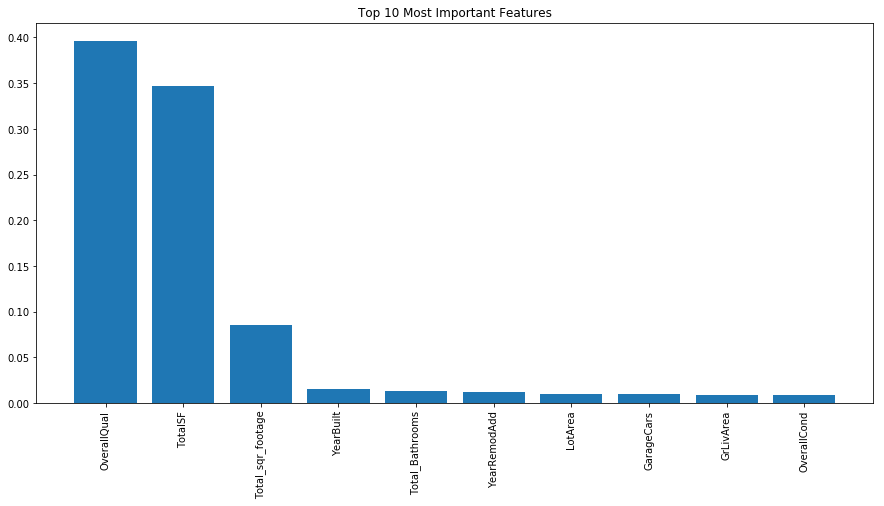

In [46]:
rf_imp = RandomForestRegressor(n_estimators=1200,
                               max_depth=15,
                               min_samples_split=5,
                               min_samples_leaf=5,
                               max_features=None,
                               oob_score=True,
                               random_state=42)
rf_imp.fit(X_train, y_train)
importances = rf_imp.feature_importances_
df_param_coeff = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(len(X_train.columns)-1):
    feat = X_train.columns[i]
    coeff = importances[i]
    df_param_coeff.loc[i] = (feat, coeff)
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff = df_param_coeff.reset_index(drop=True)
print("Top 10 features:\n{}".format(df_param_coeff.head(10)))

importances = rf_imp.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Top 10 Most Important Features") # Create plot title
plt.bar(range(10), importances[indices][:10]) # Add bars
plt.xticks(range(10), names[:10], rotation=90) # Add feature names as x-axis labels
#plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
#plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

#### 6.5 Ridge Regression

In [47]:
kfolds = KFold(n_splits=5, shuffle=True, random_state=7)
rcv_alphas = np.arange(14, 16, 0.1)
ridge = RidgeCV(alphas=rcv_alphas, 
                cv=kfolds)

#### 6.6 SVR

In [48]:
svr = SVR(C= 20, 
          epsilon= 0.008, 
          gamma=0.0003)

#### 6.7 Model Performance Review

In [49]:
# selection of algorithms to consider
start = time() # Get start time
models = []
models.append(('Ridge Regression', ridge))
models.append(('Random Forest', rf_opt))
models.append(('XGBoost Regressor', xgb_opt))
models.append(('Gradient Boosting Regressor', gbr))
models.append(('LGBM Regressor',lightgbm))
models.append(('SVR',svr))
models.append(('StackingRegressor',StackingRegressor(regressors=(gbr,
                                                                 xgb_opt,
                                                                 lightgbm,
                                                                 rf_opt,
                                                                 ridge, 
                                                                 svr),
                                                     meta_regressor=xgb_opt,
                                                     use_features_in_secondary=False)))

# set table to table to populate with performance results
rmse_results = []
names = []
col = ['Algorithm', 'RMSE Mean', 'RMSE SD']
df_results = pd.DataFrame(columns=col)

# evaluate each model using cross-validation
kfold = model_selection.KFold(n_splits=5, shuffle = True, random_state=7)
i = 0
for name, model in models:
    print("Evaluating {}...".format(name))
    # -mse scoring
    cv_mse_results = model_selection.cross_val_score(
        model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    # calculate and append rmse results
    cv_rmse_results = np.sqrt(-cv_mse_results)
    rmse_results.append(cv_rmse_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_rmse_results.mean(), 4),
                         round(cv_rmse_results.std(), 4)]
    i += 1
end = time() # Get end time
eval_time = (end-start)/60 # Calculate training time
print('Evaluation completed.\nIt took {0:.2f} minutes to evaluate all models using a 5-fold cross-validation.'.format(eval_time))
df_results.sort_values(by=['RMSE Mean'], ascending=True).reset_index(drop=True)

Evaluating Ridge Regression...
Evaluating Random Forest...
Evaluating XGBoost Regressor...
Evaluating Gradient Boosting Regressor...
Evaluating LGBM Regressor...
Evaluating SVR...
Evaluating StackingRegressor...
Evaluation completed.
It took 18.07 minutes to evaluate all models using a 5-fold cross-validation.


,Algorithm,RMSE Mean,RMSE SD
0,Gradient Boosting Regressor,0.1151,0.0122
1,StackingRegressor,0.1198,0.0119
2,LGBM Regressor,0.1201,0.0126
3,SVR,0.1248,0.0171
4,Ridge Regression,0.1296,0.0234
5,XGBoost Regressor,0.1389,0.0115
6,Random Forest,0.1415,0.0128


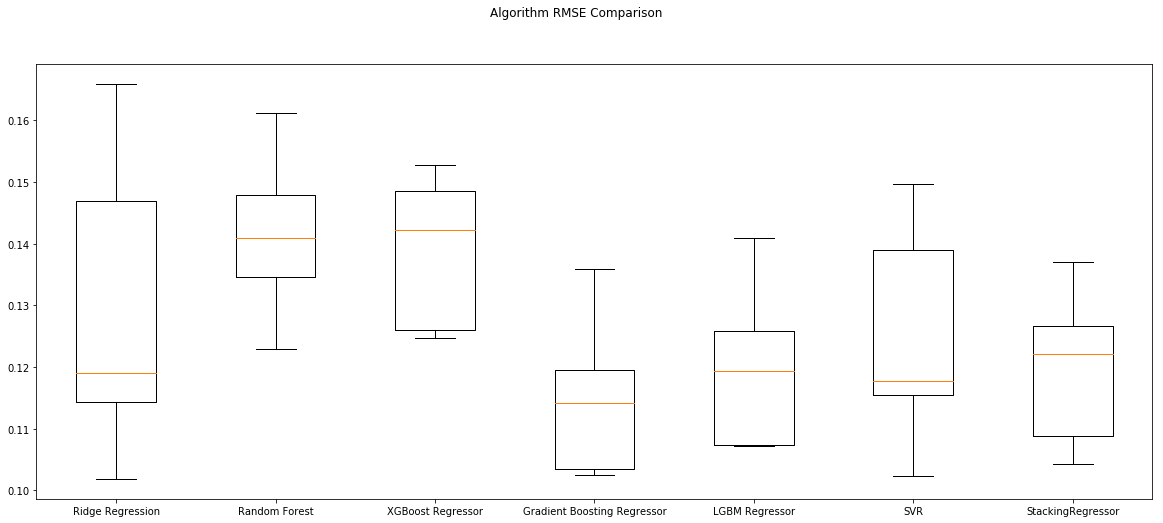

In [50]:
fig = plt.figure(figsize=(20, 8))
fig.suptitle('Algorithm RMSE Comparison')
ax = fig.add_subplot(111)
plt.boxplot(rmse_results)
ax.set_xticklabels(names)
plt.show()

----
<a class="anchor" id="seventh-bullet"></a>
## 7. Blending ML Algorithms with StackingCVRegressor

Stacking regression is an ensemble learning technique to combine multiple regression models via a meta-regressor. The individual regression models are trained based on the complete training set; then, the meta-regressor is fitted based on the outputs -- meta-features -- of the individual regression models in the ensemble.

**StackingCVRegressor** extends the standard stacking algorithm (implemented as StackingRegressor) using out-of-fold predictions to prepare the input data for the level-2 regressor.

In [51]:
stack_gen = StackingCVRegressor(regressors=(gbr,
                                            xgb_opt,
                                            lightgbm,
                                            rf_opt,
                                            ridge, 
                                            svr),
                                meta_regressor=xgb_opt,
                                use_features_in_secondary=False)

In [52]:
print('Fitting models to the training data:')
start = time() # Get start time

print('xgboost....')
xgb_model_full_data = xgb_opt.fit(df_train_ml, target_ml)
print('GradientBoosting....')
gbr_model_full_data = gbr.fit(df_train_ml, target_ml)
print('lightgbm....')
lgb_model_full_data = lightgbm.fit(df_train_ml, target_ml)
print('RandomForest....')
rf_model_full_data = rf_opt.fit(df_train_ml, target_ml)
print('Ridge....')
ridge_model_full_data = ridge.fit(df_train_ml, target_ml)
print('SVR....')
svr_model_full_data = svr.fit(df_train_ml, target_ml)
print('Stacking Regression....')
stack_gen_model = stack_gen.fit(np.array(df_train_ml), np.array(target_ml))

end = time() # Get end time
fitting_time = (end-start)/60 # Calculate training time
print('Fitting completed.\nIt took {0:.2f} minutes to fit all the models to the training data.'.format(fitting_time))

Fitting models to the training data:
xgboost....
GradientBoosting....
lightgbm....
RandomForest....
Ridge....
SVR....
Stacking Regression....
Fitting completed.
It took 16.26 minutes to fit all the models to the training data.


----
<a class="anchor" id="eigth-bullet"></a>
## 8. Submission

In [53]:
def blend_models_predict(X):
    return ((0.25 * stack_gen_model.predict(np.array(X))) + \
            (0.25 * gbr_model_full_data.predict(X)) + \
            (0.15 * svr_model_full_data.predict(X)) + \
            (0.15 * lgb_model_full_data.predict(X)) + \
            (0.1 * ridge_model_full_data.predict(X))+ \
            (0.05 * xgb_model_full_data.predict(X)) + \
            (0.05 * rf_model_full_data.predict(X)) 
           )

In [54]:
# Generate predictions from the blend
y_pred_final = np.floor(np.expm1(blend_models_predict(df_test_ml)))

In [55]:
# Generate submission dataframe
my_submission = pd.DataFrame({'Id': test.Id, 'SalePrice': y_pred_final})

# Exporting submission to CSV
my_submission.to_csv('submission-080719_v1.csv', index=False)

> I hope you enjoyed this notebook. If you found it helpful, don't hesitate to  upvote - it would be very much appreciated :-)
<br>
> I wish all the best to the rest of this amazing Kaggle community! 